<a href="https://colab.research.google.com/github/1804054Miraz/Paper-Publishing/blob/main/visualize_EEG_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is 64 channles serially.

FP1
FP2
F7
F8
AF1
AF2
FZ
F4
F3
FC6
FC5
FC2
FC1
T8
T7
CZ
C3
C4
CP5
CP6
CP1
CP2
P3
P4
PZ
P8
P7
PO2
PO1
O2
O1
X
AF7
AF8
F5
F6
FT7
FT8
FPZ
FC4
FC3
C6
C5
F2
F1
TP8
TP7
AFZ
CP3
CP4
P5
P6
C1
C2
PO7
PO8
FCZ
POZ
OZ
P2
P1
CPZ
nd
Y

In [1]:
%%capture
!pip install pandas seaborn matplotlib
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import welch

In [2]:
# from google.colab import drive

# Replace this with the actual path to your CSV file in Google Drive
non_alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/337/c_337_000_S1obj.csv'
alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_055_S2match.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(non_alcoholic_path)

# Drop the first row
# df = df.drop(0)

# If you want to reset the index after dropping the first row
# df = df.reset_index(drop=True)

# Save the modified DataFrame back to the original CSV file
df.shape

(256, 64)

In [ ]:
alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_055_S2match.csv'
df = pd.read_csv(alcoholic_path)
df

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,...,PO7,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y
0,2.126,-5.025,-3.998,5.524,2.065,4.333,1.404,-0.193,2.502,-2.797,...,-15.096,4.557,0.732,-3.072,-3.255,-3.265,-1.516,-0.529,2.167,0.783
1,4.567,-1.119,-3.510,4.547,4.018,3.845,2.869,0.295,4.456,-1.333,...,-2.401,-12.533,1.709,-4.537,-4.232,-4.242,-2.004,-1.506,5.585,3.225
2,6.521,2.787,-1.556,5.524,4.995,1.892,3.357,0.783,4.456,1.109,...,8.341,-0.814,2.197,-4.049,-4.232,-4.242,-2.492,-1.506,6.561,3.225
3,5.544,3.764,0.397,6.500,3.530,0.427,1.892,0.783,2.991,3.062,...,-3.377,2.604,1.709,-3.072,-1.790,-2.777,-2.004,-1.506,5.096,1.760
4,1.638,0.346,1.373,5.524,0.600,-1.038,0.427,-0.193,1.038,4.038,...,16.154,4.557,0.732,-1.119,1.139,-1.801,-0.051,-0.529,1.678,-0.193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-11.546,-8.931,-14.740,-14.984,-6.236,-6.409,-2.502,-1.170,-6.287,-4.262,...,-15.096,-2.279,-1.709,-5.514,-13.021,-3.754,-5.422,-1.506,-11.505,-21.189
252,-12.034,-10.885,-12.787,-19.379,-7.212,-5.432,-3.479,-4.100,-7.263,-4.751,...,-25.350,-3.743,-2.686,-6.002,-13.509,-2.777,-5.422,-1.506,-12.482,-22.654
253,-13.011,-12.349,-12.299,-19.379,-7.701,-4.456,-4.944,-6.053,-8.240,-5.239,...,-22.420,-7.650,-3.174,-5.025,-13.021,-2.289,-3.469,-1.017,-13.458,-22.654
254,-13.011,-12.838,-13.275,-13.031,-7.701,-2.991,-5.432,-6.541,-7.751,-5.727,...,-7.772,-8.138,-3.174,-3.560,-11.068,-1.801,-1.516,-0.529,-12.970,-20.701


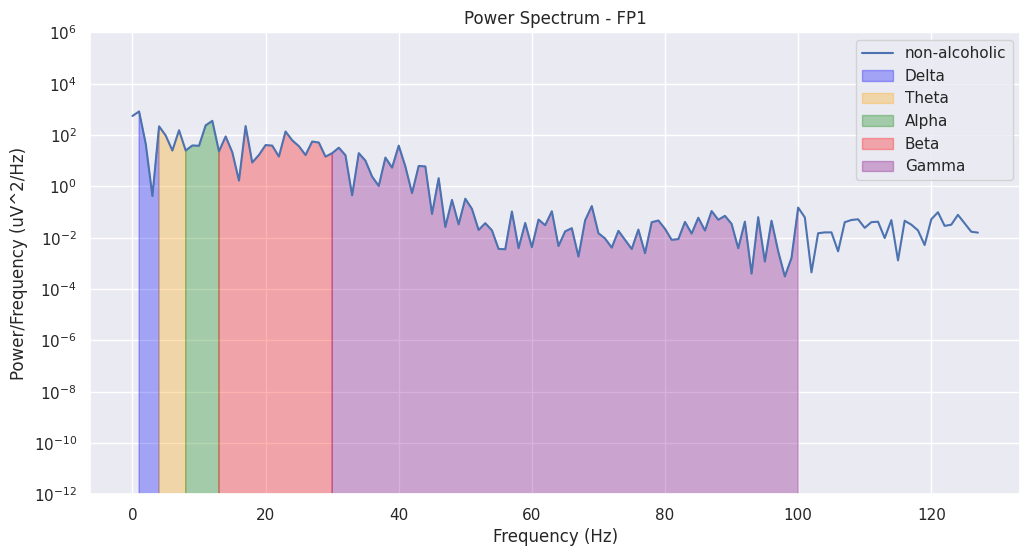

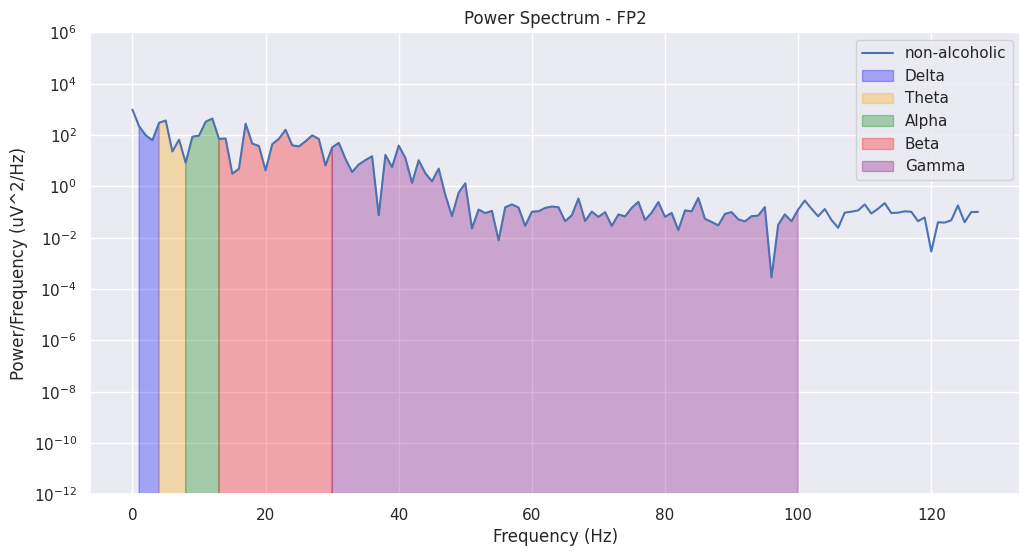

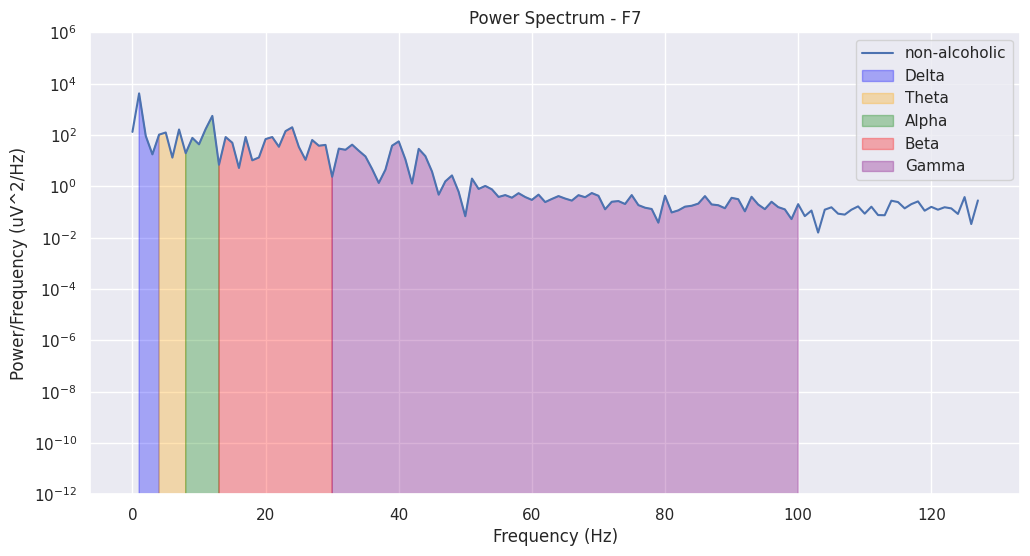

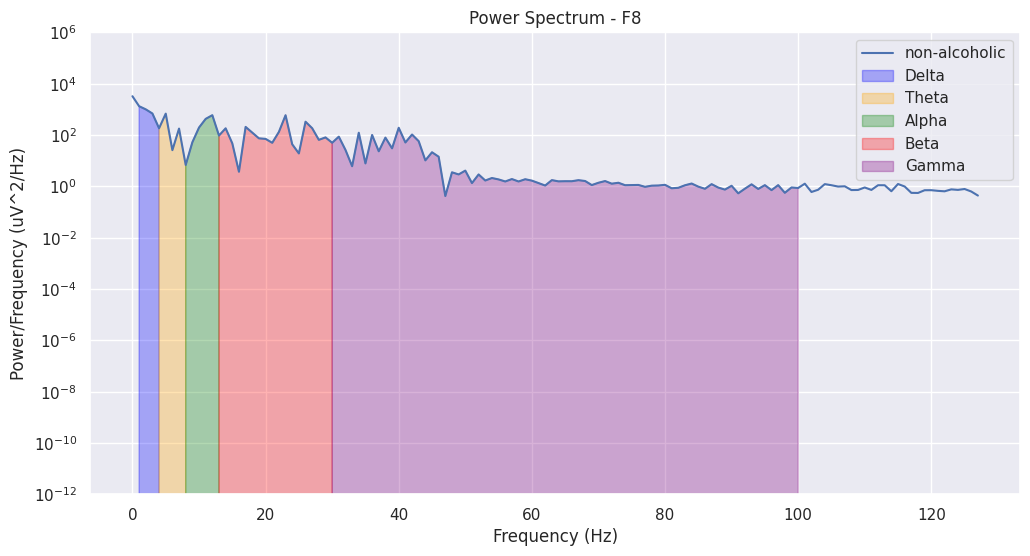

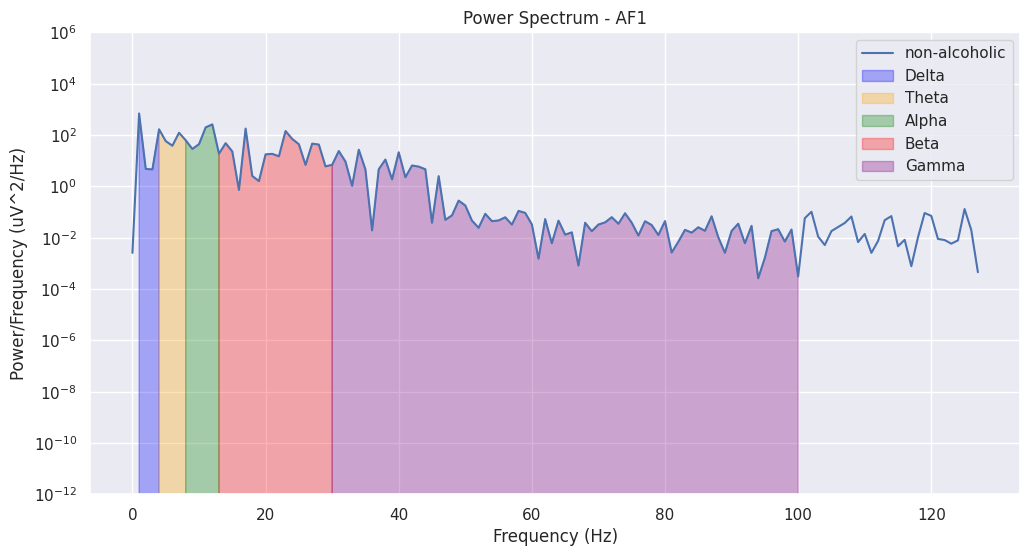

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Load your EEG data from the CSV file
eeg_data = pd.read_csv(non_alcoholic_path)

# Assuming your EEG data is in micro-volts and each row corresponds to a time point
# You may need to adjust this based on the structure of your data

# Define the sampling rate (Hz)
sampling_rate = 256

# Function to calculate the power spectral density using FFT
def calculate_power_spectrum(data_row, sampling_rate):
    n = len(data_row)
    frequencies = fftfreq(n, d=1/sampling_rate)
    fft_values = fft(np.ascontiguousarray(data_row))
    power_spectrum = np.abs(fft_values)**2 / n
    return frequencies[:n//2], power_spectrum[:n//2]

# Function to plot the power spectrum for a given channel
def plot_power_spectrum(data_column, column_name, label_name):
    frequencies, power_spectrum = calculate_power_spectrum(data_column, sampling_rate)

    # Define frequency bands
    delta_band = (0.5, 4)
    theta_band = (4, 8)
    alpha_band = (8, 13)
    beta_band = (13, 30)  # Adjusted to include the beta range
    gamma_band = (30, 100)  # Example, adjust based on your data

    # Plot the power spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, power_spectrum, label=label_name)

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.3, label='Delta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.3, label='Theta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.3, label='Alpha')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.3, label='Beta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.3, label='Gamma')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data
    plt.title(f'Power Spectrum - {column_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.legend()
    plt.show()

# Plot power spectrum for each channel
i=1
for column in eeg_data.columns:
    plot_power_spectrum(eeg_data[column], column, 'non-alcoholic')
    if i==5:
      break;
    i+=1


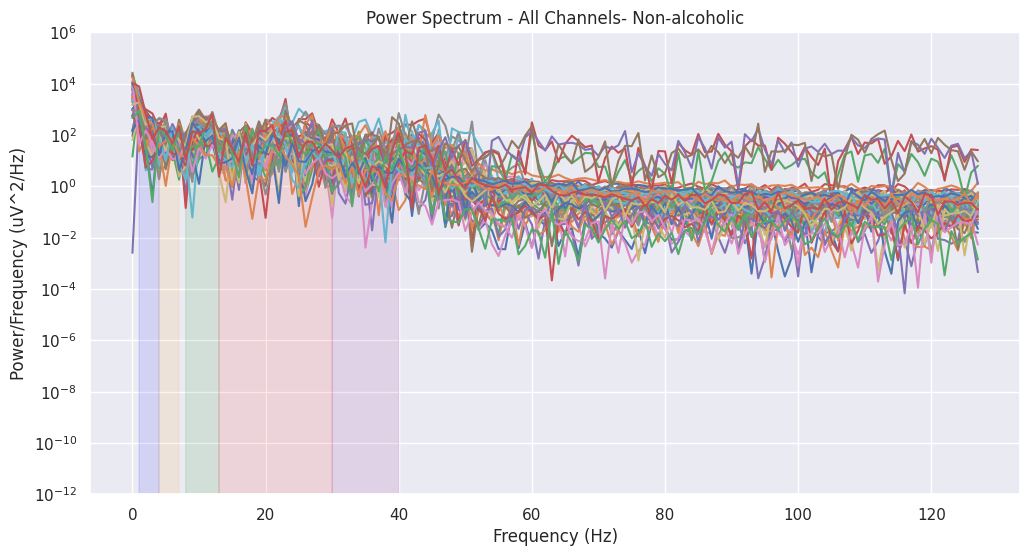

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Load your EEG data from the CSV file
eeg_data = pd.read_csv(non_alcoholic_path)

# Assuming your EEG data is in micro-volts and each row corresponds to a time point
# You may need to adjust this based on the structure of your data

# Define the sampling rate (Hz)
sampling_rate = 256

# Function to calculate the power spectral density using FFT
def calculate_power_spectrum(data_row, sampling_rate):
    n = len(data_row)
    frequencies = fftfreq(n, d=1/sampling_rate)
    fft_values = fft(np.ascontiguousarray(data_row))
    power_spectrum = np.abs(fft_values)**2 / n
    return frequencies[:n//2], power_spectrum[:n//2]

# Function to plot the power spectrum for all channels
def plot_power_spectrum_all_channels(eeg_data, sampling_rate):
    # Define frequency bands
    delta_band = (0.5, 4)
    theta_band = (4, 7)
    alpha_band = (8, 13)
    beta_band = (13, 30)
    gamma_band = (30, 40)  # Example, adjust based on your data

    plt.figure(figsize=(12, 6))

    for column in eeg_data.columns:
        frequencies, power_spectrum = calculate_power_spectrum(eeg_data[column], sampling_rate)

        # Plot the power spectrum for each channel with different colors
        plt.plot(frequencies, power_spectrum, label=column)

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.1, label='Delta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.1, label='Theta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.1, label='Alpha')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.1, label='Beta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.1, label='Gamma')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data

    plt.title('Power Spectrum - All Channels- Non-alcoholic')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    # plt.legend()
    plt.show()

# Plot power spectrum for all channels
plot_power_spectrum_all_channels(eeg_data, sampling_rate)


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(alcoholic_path)

# Drop the first row
# df = df.drop(0)

# If you want to reset the index after dropping the first row
# df = df.reset_index(drop=True)

# Save the modified DataFrame back to the original CSV file
df.shape

(256, 64)

In [ ]:
df.head()

,FP1,FP2,F7,F8,AF1,AF2,FZ,F4,F3,FC6,...,PO7,PO8,FCZ,POZ,OZ,P2,P1,CPZ,nd,Y
0,2.126,-5.025,-3.998,5.524,2.065,4.333,1.404,-0.193,2.502,-2.797,...,-15.096,4.557,0.732,-3.072,-3.255,-3.265,-1.516,-0.529,2.167,0.783
1,4.567,-1.119,-3.510,4.547,4.018,3.845,2.869,0.295,4.456,-1.333,...,-2.401,-12.533,1.709,-4.537,-4.232,-4.242,-2.004,-1.506,5.585,3.225
2,6.521,2.787,-1.556,5.524,4.995,1.892,3.357,0.783,4.456,1.109,...,8.341,-0.814,2.197,-4.049,-4.232,-4.242,-2.492,-1.506,6.561,3.225
3,5.544,3.764,0.397,6.500,3.530,0.427,1.892,0.783,2.991,3.062,...,-3.377,2.604,1.709,-3.072,-1.790,-2.777,-2.004,-1.506,5.096,1.760
4,1.638,0.346,1.373,5.524,0.600,-1.038,0.427,-0.193,1.038,4.038,...,16.154,4.557,0.732,-1.119,1.139,-1.801,-0.051,-0.529,1.678,-0.193


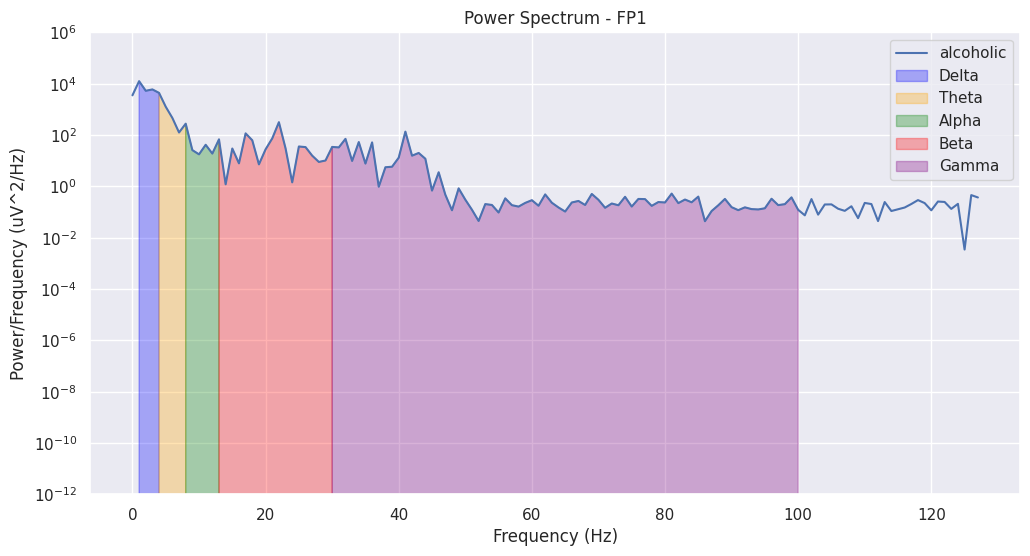

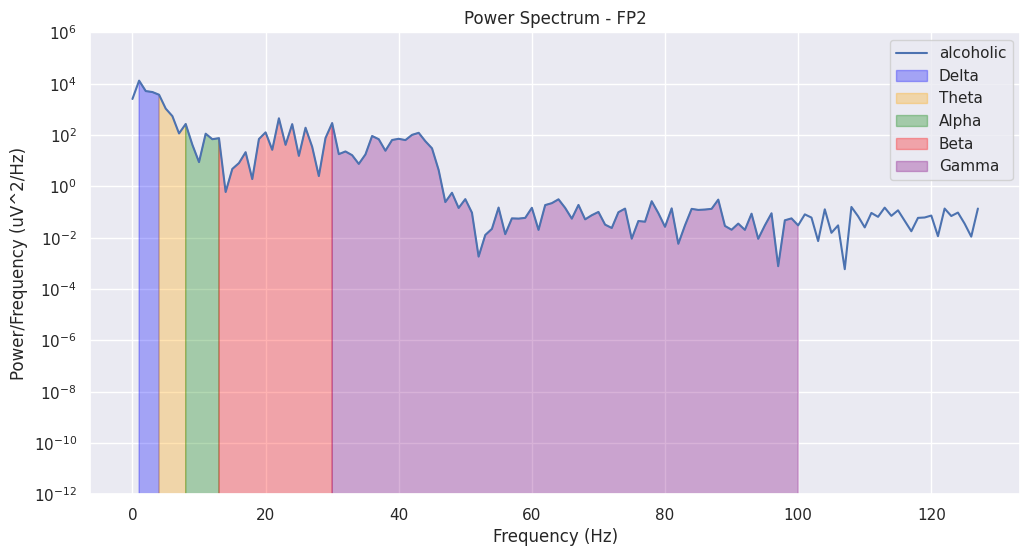

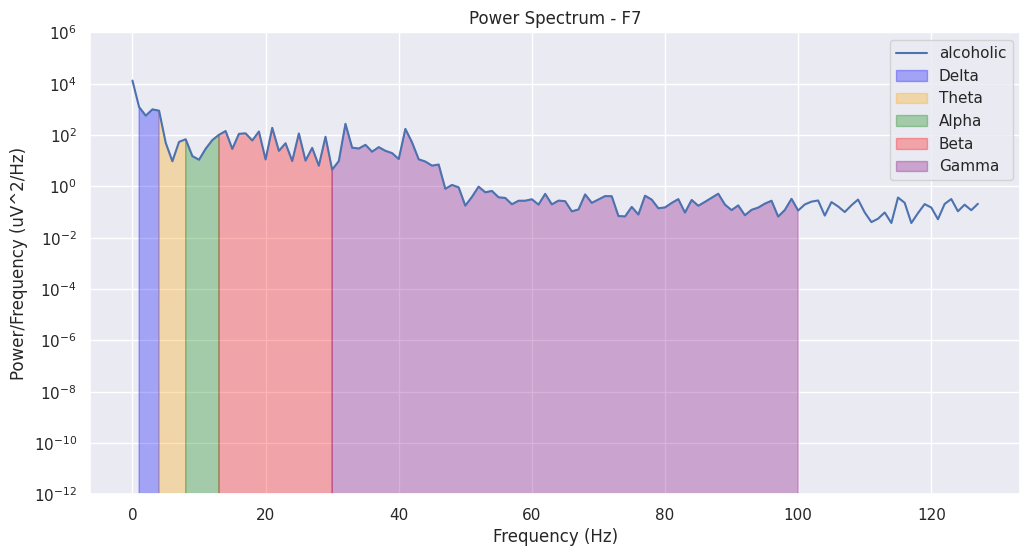

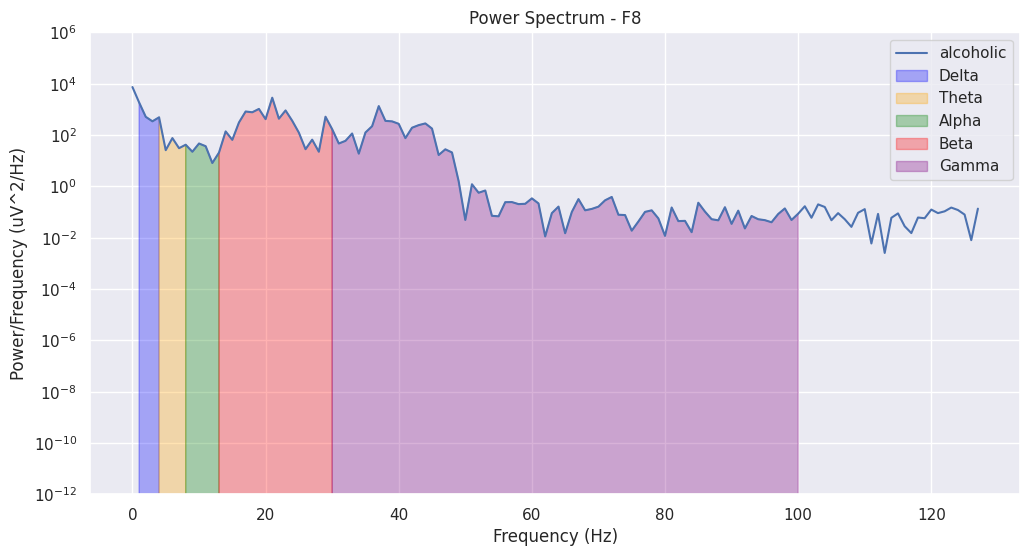

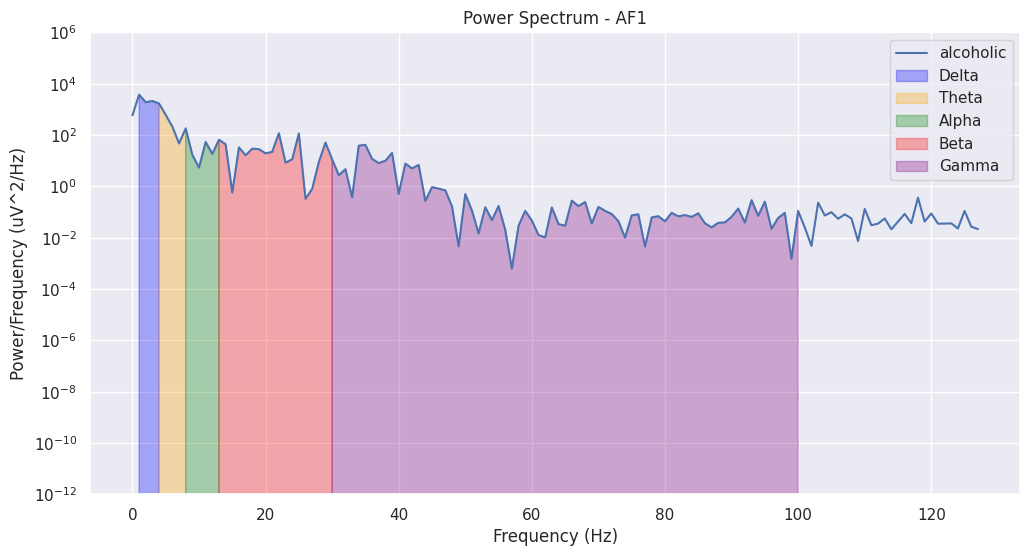

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Load your EEG data from the CSV file
eeg_data = pd.read_csv(alcoholic_path)

# Assuming your EEG data is in micro-volts and each row corresponds to a time point
# You may need to adjust this based on the structure of your data

# Define the sampling rate (Hz)
sampling_rate = 256

# Function to calculate the power spectral density using FFT
def calculate_power_spectrum(data_row, sampling_rate):
    n = len(data_row)
    frequencies = fftfreq(n, d=1/sampling_rate)
    fft_values = fft(np.ascontiguousarray(data_row))
    power_spectrum = np.abs(fft_values)**2 / n
    return frequencies[:n//2], power_spectrum[:n//2]

# Function to plot the power spectrum for a given channel
def plot_power_spectrum(data_column, column_name, label_name):
    frequencies, power_spectrum = calculate_power_spectrum(data_column, sampling_rate)

    # Define frequency bands
    delta_band = (0.5, 4)
    theta_band = (4, 8)
    alpha_band = (8, 13)
    beta_band = (13, 30)  # Adjusted to include the beta range
    gamma_band = (30, 100)  # Example, adjust based on your data

    # Plot the power spectrum
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, power_spectrum, label=label_name)

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.3, label='Delta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.3, label='Theta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.3, label='Alpha')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.3, label='Beta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.3, label='Gamma')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data
    plt.title(f'Power Spectrum - {column_name}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.legend()
    plt.show()

# Plot power spectrum for each channel
i=1
for column in eeg_data.columns:
    plot_power_spectrum(eeg_data[column], column, 'alcoholic')
    if i==5:
      break;
    i+=1


In [14]:
alcoholic_ps = '/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Alcoholic/364/ps_a_364_055_S2match.csv'
df = pd.read_csv(alcoholic_ps)
df

,Frequency,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,...,PO7_PS,PO8_PS,FCZ_PS,POZ_PS,OZ_PS,P2_PS,P1_PS,CPZ_PS,nd_PS,Y_PS
0,0.0,3488.275548,2516.082030,13096.799702,7327.627502,580.252821,466.851646,2.517974,866.069720,953.802154,...,74013.310903,28323.038730,15.986503,9404.259722,26553.843162,5108.398663,3912.635420,578.835481,3232.469704,37793.887242
1,1.0,12398.608222,13024.772432,1218.618350,1847.247992,3703.481951,3469.068930,798.114224,1434.900201,721.543580,...,1008.059321,363.226049,100.288831,399.357088,771.079361,330.652856,231.750146,109.379183,11607.754822,544.935375
2,2.0,5239.120613,5106.254571,563.400446,506.590548,1881.015461,1494.869190,469.451563,391.754372,406.947188,...,2870.305379,1024.510764,62.478587,397.998547,1048.204754,207.065385,261.694028,91.090696,4929.498270,1677.651720
3,3.0,5918.025911,4680.815776,988.535948,338.611276,2099.600067,1236.734895,584.741502,233.895558,552.871226,...,57.684719,48.619300,90.623242,94.634602,24.570632,61.509663,59.452605,17.243688,5759.440920,560.732894
4,4.0,4330.716855,3672.280329,878.778303,484.728953,1665.912748,1286.013698,487.833011,416.146997,554.567792,...,16.349957,56.186487,112.487388,120.757086,178.635635,83.904102,76.245228,48.451072,4147.914827,754.802514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123.0,0.131151,0.069247,0.317860,0.147686,0.035843,0.049483,0.095193,0.040727,0.168862,...,123.517414,49.004761,0.011852,0.086995,0.042100,0.004483,0.000333,0.029918,0.132717,0.315683
124,124.0,0.206294,0.094207,0.105710,0.118519,0.022660,0.015419,0.041275,0.065790,0.166412,...,299.737245,27.681191,0.024356,0.011278,0.001414,0.024140,0.165341,0.090687,0.116970,0.249844
125,125.0,0.003421,0.035120,0.191359,0.078817,0.109609,0.101289,0.114954,0.078344,0.084293,...,10.057518,53.845456,0.032427,0.044812,0.054229,0.047525,0.001590,0.005469,0.140961,0.421670
126,126.0,0.452133,0.010898,0.116645,0.007932,0.026616,0.030909,0.019471,0.038660,0.072519,...,2.898093,49.591858,0.018024,0.028098,0.018632,0.046153,0.035885,0.007464,0.231329,0.167339


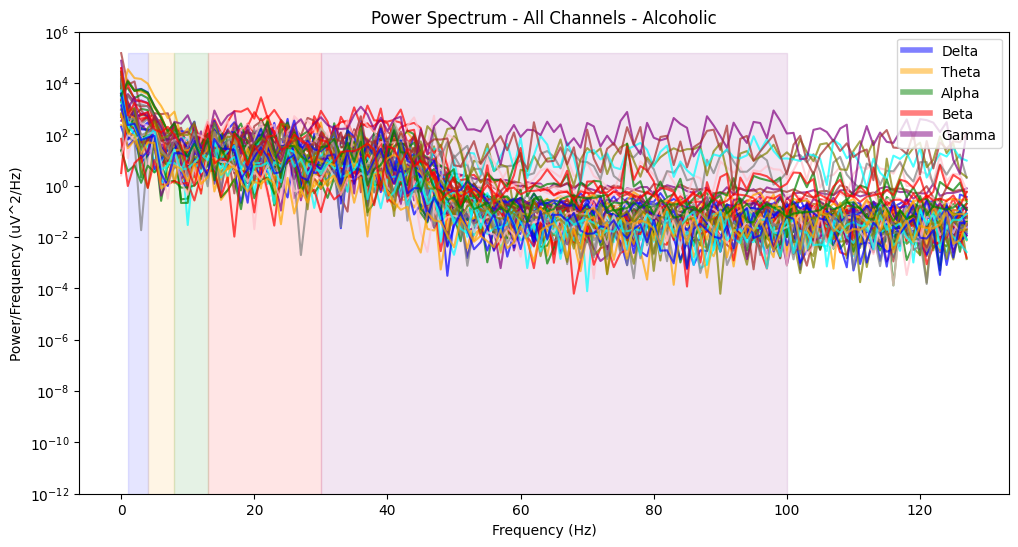

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your EEG data from the CSV file
alcoholic_ps = '/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Alcoholic/364/ps_a_364_055_S2match.csv'
df = pd.read_csv(alcoholic_ps)

# Extract the frequency column
frequencies = df['Frequency']

# Define frequency bands
delta_band = (0.5, 4)
theta_band = (4, 8)
alpha_band = (8, 13)
beta_band = (13, 30)
gamma_band = (30, 100)  # Example, adjust based on your data

# Function to plot the power spectrum for all channels
def plot_power_spectrum_all_channels(df, frequencies):
    plt.figure(figsize=(12, 6))

    # Define a set of standard colors for channels
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    num_colors = len(colors)

    # Plot the power spectrum for each channel with different colors
    for idx, column in enumerate(df.columns[1:]):  # Skip the frequency column
        plt.plot(frequencies, df[column], color=colors[idx % num_colors], alpha=0.7)

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, np.max(df.values[:, 1:]), where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.1, label='Delta')
    plt.fill_between(frequencies, 0, np.max(df.values[:, 1:]), where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.1, label='Theta')
    plt.fill_between(frequencies, 0, np.max(df.values[:, 1:]), where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.1, label='Alpha')
    plt.fill_between(frequencies, 0, np.max(df.values[:, 1:]), where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.1, label='Beta')
    plt.fill_between(frequencies, 0, np.max(df.values[:, 1:]), where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.1, label='Gamma')

    # Adding legend manually for the frequency bands
    handles = [
        plt.Line2D([0], [0], color='blue', lw=4, alpha=0.5, label='Delta'),
        plt.Line2D([0], [0], color='orange', lw=4, alpha=0.5, label='Theta'),
        plt.Line2D([0], [0], color='green', lw=4, alpha=0.5, label='Alpha'),
        plt.Line2D([0], [0], color='red', lw=4, alpha=0.5, label='Beta'),
        plt.Line2D([0], [0], color='purple', lw=4, alpha=0.5, label='Gamma')
    ]
    plt.legend(handles=handles, loc='upper right')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data

    plt.title('Power Spectrum - All Channels - Alcoholic')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.show()

# Plot power spectrum for all channels
plot_power_spectrum_all_channels(df, frequencies)


In [67]:
non_alcoholic_ps='/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Non-alcoholic/337/ps_c_337_000_S1obj.csv'
df = pd.read_csv(non_alcoholic_ps)
df

,Frequency,FP1_PS,FP2_PS,F7_PS,F8_PS,AF1_PS,AF2_PS,FZ_PS,F4_PS,F3_PS,...,PO7_PS,PO8_PS,FCZ_PS,POZ_PS,OZ_PS,P2_PS,P1_PS,CPZ_PS,nd_PS,Y_PS
0,0.0,547.884723,963.881281,130.982303,3216.279300,0.002538,922.629234,5588.711840,550.286561,1509.254513,...,589.114814,6597.916910,12025.356723,935.690745,1510.813737,12503.013535,10138.048172,17741.890352,458.529952,10648.330886
1,1.0,819.531713,216.864204,4134.515034,1313.647960,683.226989,755.452475,185.044392,426.457100,1070.206225,...,2144.144251,2526.908553,43.624841,837.490204,1874.434206,3579.109619,2633.301650,2134.100326,840.909138,7730.252791
2,2.0,44.441600,96.099515,91.458540,991.190095,4.722634,60.117776,70.912183,33.287965,48.629017,...,186.351228,90.224634,147.603108,208.332741,249.616093,345.130129,512.098507,410.974796,33.050420,661.174635
3,3.0,0.415771,61.702660,17.465256,682.590870,4.526152,30.939623,35.513304,52.351094,34.046538,...,124.923330,235.754642,49.654244,374.328384,315.550401,454.168816,457.320673,264.256440,0.242056,68.195488
4,4.0,215.808003,295.826015,102.501309,181.502819,164.873432,188.741612,17.614641,61.258489,61.232382,...,248.427319,169.200301,12.779026,98.993340,91.827068,83.767698,16.382755,35.816430,211.509846,195.598528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123.0,0.031727,0.047218,0.137192,0.755298,0.005790,0.083872,0.049413,0.052885,0.033681,...,37.853514,25.541962,0.025169,0.530602,0.084450,0.347972,0.520507,0.269986,0.017915,0.252798
124,124.0,0.076992,0.178888,0.083570,0.721564,0.007767,0.079408,0.032840,0.029815,0.022189,...,45.023563,22.985327,0.038066,0.404690,0.089515,0.559755,0.462309,0.301079,0.005556,0.189608
125,125.0,0.036368,0.039633,0.378242,0.780565,0.129417,0.074218,0.029669,0.006729,0.060039,...,12.388222,4.365514,0.038787,0.067429,0.108806,0.331199,0.339066,0.541103,0.010002,0.228545
126,126.0,0.016923,0.098631,0.033671,0.623947,0.019842,0.140178,0.045091,0.019712,0.070498,...,22.992898,22.955330,0.032323,0.186451,0.071921,0.313122,0.290283,0.184865,0.015408,0.221093


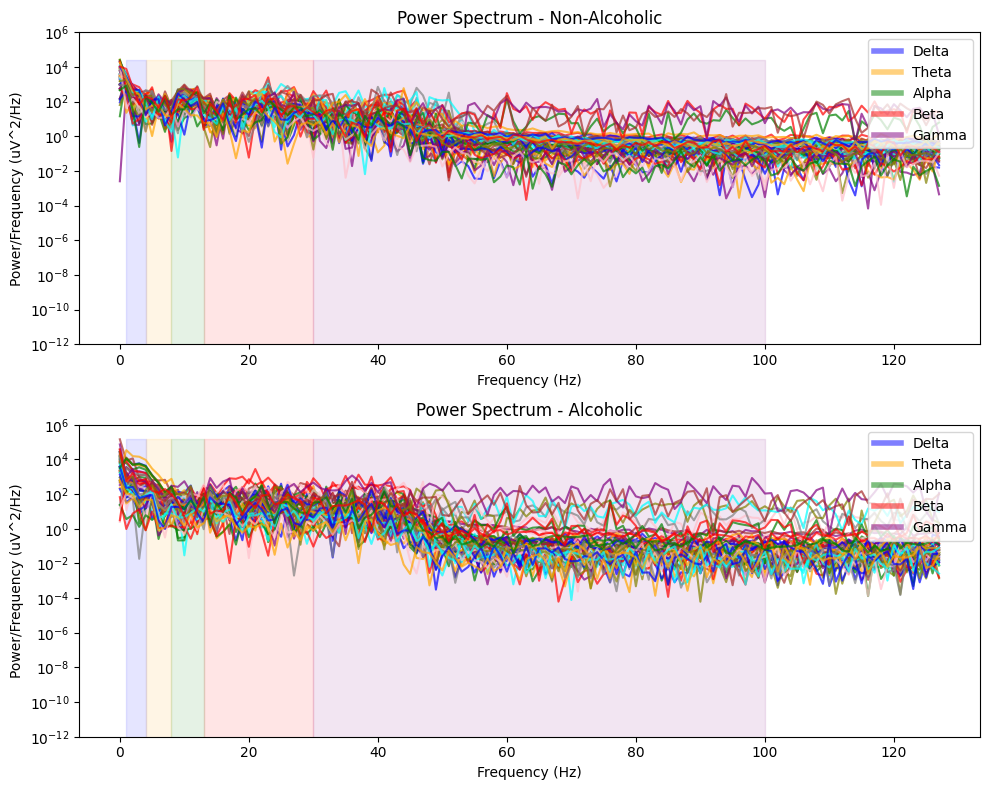

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your EEG data from the CSV files
non_alcoholic_ps = '/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Non-alcoholic/337/ps_c_337_000_S1obj.csv'
alcoholic_ps = '/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Alcoholic/364/ps_a_364_055_S2match.csv'

df_non_alcoholic = pd.read_csv(non_alcoholic_ps)
df_alcoholic = pd.read_csv(alcoholic_ps)

# Extract the frequency column
frequencies = df_non_alcoholic['Frequency']

# Define frequency bands
delta_band = (0.5, 4)
theta_band = (4, 8)
alpha_band = (8, 13)
beta_band = (13, 30)
gamma_band = (30, 100)  # Example, adjust based on your data

# Function to plot the power spectrum for all channels
def plot_power_spectrum_comparison(df1, df2, frequencies, title1, title2):
    plt.figure(figsize=(10, 8))

    # Define a set of standard colors for channels
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    num_colors = len(colors)

    # Subplot 1: Non-Alcoholic
    plt.subplot(2, 1, 1)
    for idx, column in enumerate(df1.columns[1:]):  # Skip the frequency column
        plt.plot(frequencies, df1[column], color=colors[idx % num_colors], alpha=0.7)
    plt.fill_between(frequencies, 0, np.max(df1.values[:, 1:]), where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.1, label='Delta')
    plt.fill_between(frequencies, 0, np.max(df1.values[:, 1:]), where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.1, label='Theta')
    plt.fill_between(frequencies, 0, np.max(df1.values[:, 1:]), where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.1, label='Alpha')
    plt.fill_between(frequencies, 0, np.max(df1.values[:, 1:]), where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.1, label='Beta')
    plt.fill_between(frequencies, 0, np.max(df1.values[:, 1:]), where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.1, label='Gamma')
    plt.yscale('log')
    plt.ylim(1e-12, 1e6)
    plt.title(f'Power Spectrum - {title1}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    handles = [
        plt.Line2D([0], [0], color='blue', lw=4, alpha=0.5, label='Delta'),
        plt.Line2D([0], [0], color='orange', lw=4, alpha=0.5, label='Theta'),
        plt.Line2D([0], [0], color='green', lw=4, alpha=0.5, label='Alpha'),
        plt.Line2D([0], [0], color='red', lw=4, alpha=0.5, label='Beta'),
        plt.Line2D([0], [0], color='purple', lw=4, alpha=0.5, label='Gamma')
    ]
    plt.legend(handles=handles, loc='upper right')

    # Subplot 2: Alcoholic
    plt.subplot(2, 1, 2)
    for idx, column in enumerate(df2.columns[1:]):  # Skip the frequency column
        plt.plot(frequencies, df2[column], color=colors[idx % num_colors], alpha=0.7)
    plt.fill_between(frequencies, 0, np.max(df2.values[:, 1:]), where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.1, label='Delta')
    plt.fill_between(frequencies, 0, np.max(df2.values[:, 1:]), where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.1, label='Theta')
    plt.fill_between(frequencies, 0, np.max(df2.values[:, 1:]), where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.1, label='Alpha')
    plt.fill_between(frequencies, 0, np.max(df2.values[:, 1:]), where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.1, label='Beta')
    plt.fill_between(frequencies, 0, np.max(df2.values[:, 1:]), where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.1, label='Gamma')
    plt.yscale('log')
    plt.ylim(1e-12, 1e6)
    plt.title(f'Power Spectrum - {title2}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.legend(handles=handles, loc='upper right')
    plt.tight_layout()
    plt.show()

# Plot power spectrum for both datasets
plot_power_spectrum_comparison(df_non_alcoholic, df_alcoholic, frequencies, 'Non-Alcoholic', 'Alcoholic')


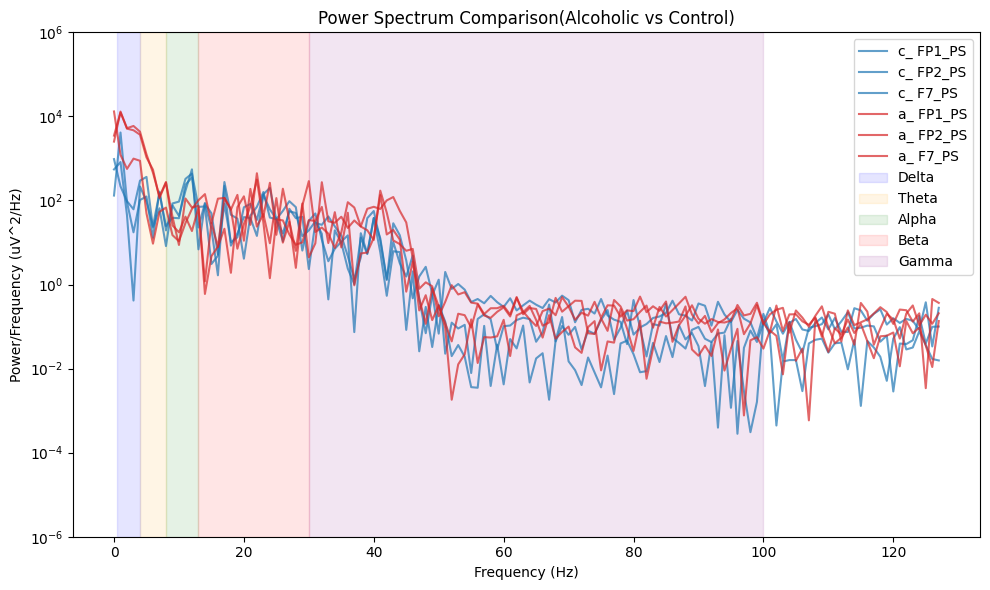

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your EEG data from the CSV files
non_alcoholic_ps = '/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Non-alcoholic/337/ps_c_337_000_S1obj.csv'
alcoholic_ps = '/content/drive/MyDrive/Dataset/EEG_FULL/EEG_Power_Spectrum_files/PS_Alcoholic/364/ps_a_364_055_S2match.csv'

df_non_alcoholic = pd.read_csv(non_alcoholic_ps)
df_alcoholic = pd.read_csv(alcoholic_ps)

# Extract the frequency column
frequencies = df_non_alcoholic['Frequency']

# Define frequency bands
delta_band = (0.5, 4)
theta_band = (4, 8)
alpha_band = (8, 13)
beta_band = (13, 30)
gamma_band = (30, 100)  # Example, adjust based on your data

# Function to plot the power spectrum for specific channels
def plot_power_spectrum_comparison_specific_channels(df1, df2, frequencies, title1, title2, channels):
    plt.figure(figsize=(10, 6))

    # Define colors for Non-Alcoholic and Alcoholic channels
    non_alcoholic_color = '#1f77b4'  # Blue
    alcoholic_color = '#d62728'  # Red

    # Plot power spectrum for Non-Alcoholic channels
    for idx, channel in enumerate(channels):
        plt.plot(frequencies, df1[channel], color=non_alcoholic_color, alpha=0.7, label=f'c_ {channel}')

    # Plot power spectrum for Alcoholic channels
    for idx, channel in enumerate(channels):
        plt.plot(frequencies, df2[channel], color=alcoholic_color, alpha=0.7, label=f'a_ {channel}')

    # Plot frequency bands range
    plt.axvspan(delta_band[0], delta_band[1], color='blue', alpha=0.1, label='Delta')
    plt.axvspan(theta_band[0], theta_band[1], color='orange', alpha=0.1, label='Theta')
    plt.axvspan(alpha_band[0], alpha_band[1], color='green', alpha=0.1, label='Alpha')
    plt.axvspan(beta_band[0], beta_band[1], color='red', alpha=0.1, label='Beta')
    plt.axvspan(gamma_band[0], gamma_band[1], color='purple', alpha=0.1, label='Gamma')

    plt.yscale('log')
    plt.ylim(1e-6, 1e6)
    plt.title('Power Spectrum Comparison(Alcoholic vs Control)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# Channels to be compared
channels_to_compare = ['FP1_PS','FP2_PS', 'F7_PS']

# Plot power spectrum for specific channels in both datasets
plot_power_spectrum_comparison_specific_channels(df_non_alcoholic, df_alcoholic, frequencies, 'Non-Alcoholic', 'Alcoholic', channels_to_compare)


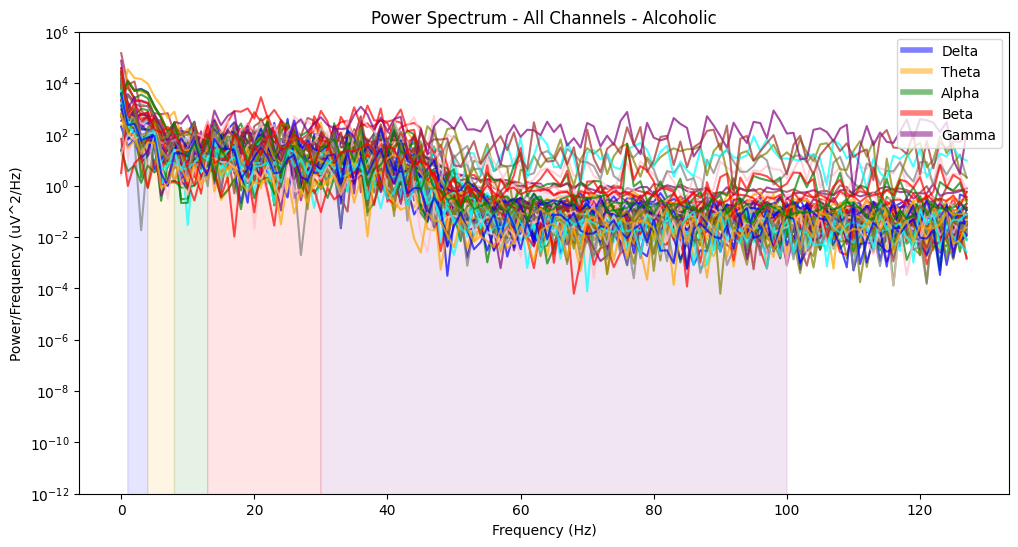

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Load your EEG data from the CSV file
eeg_data = pd.read_csv(alcoholic_path)

# Assuming your EEG data is in micro-volts and each row corresponds to a time point
# You may need to adjust this based on the structure of your data

# Define the sampling rate (Hz)
sampling_rate = 256

# Function to calculate the power spectral density using FFT
def calculate_power_spectrum(data_row, sampling_rate):
    n = len(data_row)
    frequencies = fftfreq(n, d=1/sampling_rate)
    fft_values = fft(np.ascontiguousarray(data_row))
    power_spectrum = np.abs(fft_values)**2 / n
    return frequencies[:n//2], power_spectrum[:n//2]

# Function to plot the power spectrum for all channels
def plot_power_spectrum_all_channels(eeg_data, sampling_rate):
    # Define frequency bands
    delta_band = (0.5, 4)
    theta_band = (4, 8)
    alpha_band = (8, 13)
    beta_band = (13, 30)
    gamma_band = (30, 100)  # Example, adjust based on your data

    plt.figure(figsize=(12, 6))

    # Define a set of standard colors for channels
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    num_colors = len(colors)

    # Plot the power spectrum for each channel with different colors
    for idx, column in enumerate(eeg_data.columns):
        frequencies, power_spectrum = calculate_power_spectrum(eeg_data[column], sampling_rate)
        plt.plot(frequencies, power_spectrum, color=colors[idx % num_colors], alpha=0.7)

    # Highlight different frequency bands
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= delta_band[0]) & (frequencies <= delta_band[1]), color='blue', alpha=0.1, label='Delta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= theta_band[0]) & (frequencies <= theta_band[1]), color='orange', alpha=0.1, label='Theta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= alpha_band[0]) & (frequencies <= alpha_band[1]), color='green', alpha=0.1, label='Alpha')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= beta_band[0]) & (frequencies <= beta_band[1]), color='red', alpha=0.1, label='Beta')
    plt.fill_between(frequencies, 0, power_spectrum, where=(frequencies >= gamma_band[0]) & (frequencies <= gamma_band[1]), color='purple', alpha=0.1, label='Gamma')

    # Adding legend manually for the frequency bands
    handles = [
        plt.Line2D([0], [0], color='blue', lw=4, alpha=0.5, label='Delta'),
        plt.Line2D([0], [0], color='orange', lw=4, alpha=0.5, label='Theta'),
        plt.Line2D([0], [0], color='green', lw=4, alpha=0.5, label='Alpha'),
        plt.Line2D([0], [0], color='red', lw=4, alpha=0.5, label='Beta'),
        plt.Line2D([0], [0], color='purple', lw=4, alpha=0.5, label='Gamma')
    ]
    plt.legend(handles=handles, loc='upper right')

    plt.yscale('log')  # Set y-axis to logarithmic scale
    plt.ylim(1e-12, 1e6)  # Adjust y-axis limits based on your data

    plt.title('Power Spectrum - All Channels - Alcoholic')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (uV^2/Hz)')
    plt.show()

# Plot power spectrum for all channels
plot_power_spectrum_all_channels(eeg_data, sampling_rate)


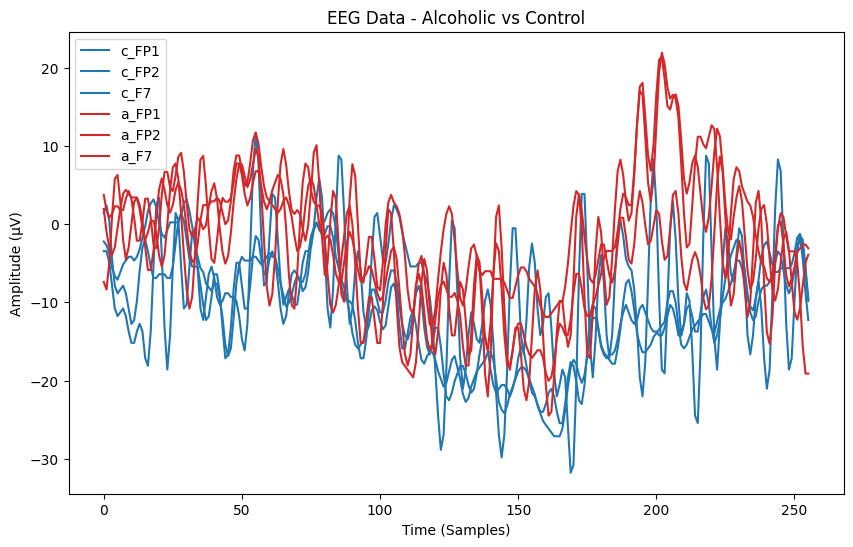

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load EEG data for non-alcoholic and alcoholic paths
non_alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/337/c_337_067_S2nomatch.csv'
alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_119_S2match.csv'

non_alcoholic_data = pd.read_csv(non_alcoholic_path)
alcoholic_data = pd.read_csv(alcoholic_path)
# Plot each column separately
plt.figure(figsize=(10, 6))

i = 0
for column in non_alcoholic_data.columns:
    plt.plot(non_alcoholic_data[column], label='c_' + column, color='#1f77b4' )
    if i == 2:
      break
    i += 1

# Plot alcoholic data in blue
i = 0
for column in alcoholic_data.columns:
    plt.plot(alcoholic_data[column], label='a_' + column, color='#d62728')
    if i == 2:
      break
    i += 1

plt.title('EEG Data - Alcoholic vs Control')
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude (μV)')
plt.legend()
plt.show()


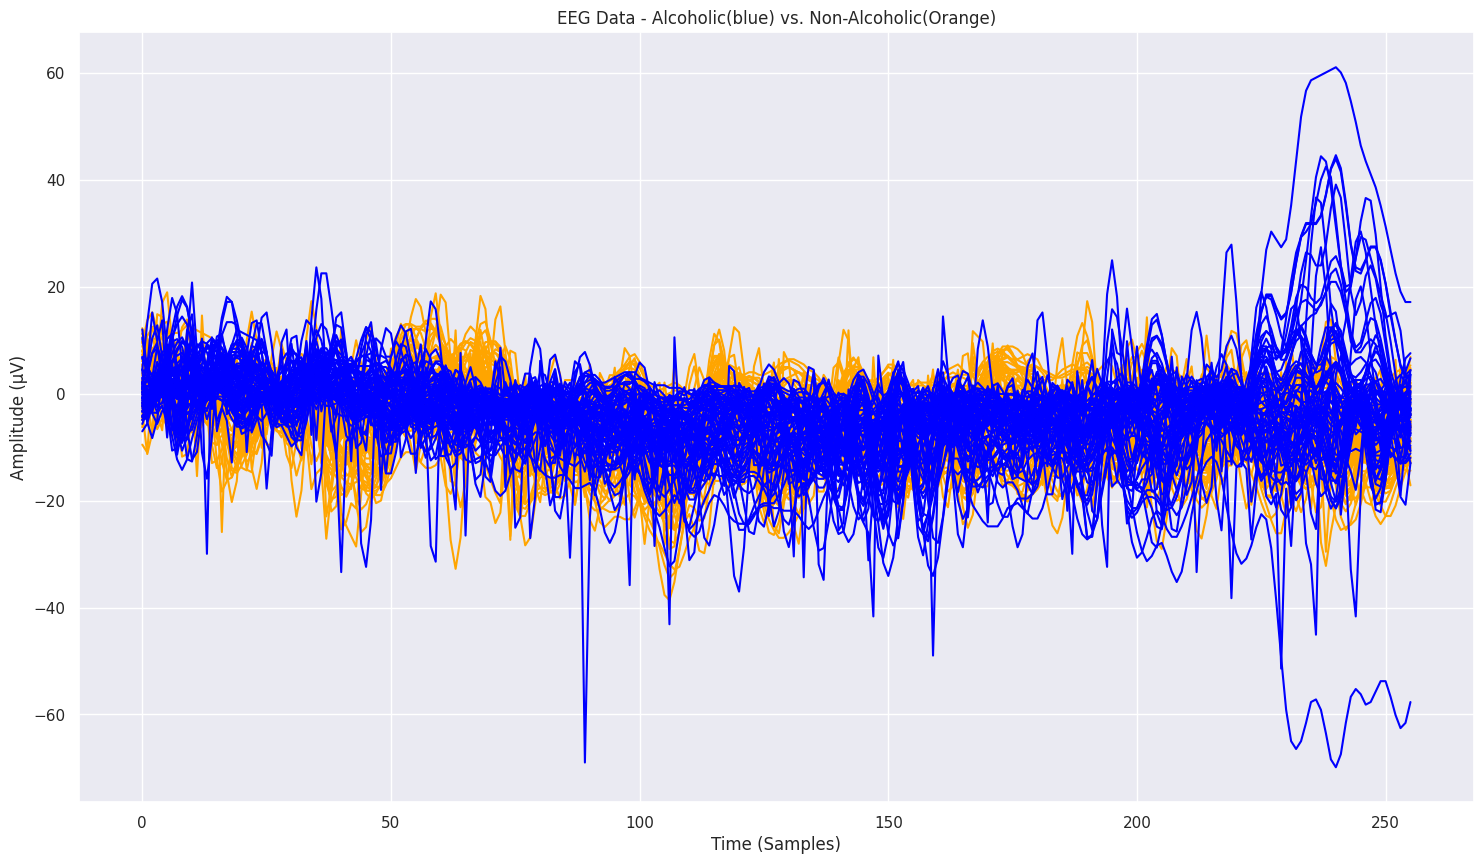

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load EEG data for non-alcoholic and alcoholic paths
# non_alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/337/c_337_000_S1obj.csv'
non_alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/Transfer_new_non_alcoholic/337/c_337_025_S2match.csv'
# alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_055_S2match.csv'
# alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_079_S2match.csv'
alcoholic_path = '/content/drive/MyDrive/Dataset/EEG_FULL/New_alcoholic/364/a_364_109_S2match.csv'

non_alcoholic_data = pd.read_csv(non_alcoholic_path)
alcoholic_data = pd.read_csv(alcoholic_path)
# Plot each column separately
plt.figure(figsize=(18, 10))


i=0
for column in non_alcoholic_data.columns:
    plt.plot(non_alcoholic_data[column], label=column, color='orange' )
    # if i==6:
    #   break
    # i+=1

# Plot alcoholic data in blue
i=0
for column in alcoholic_data.columns:
    plt.plot(alcoholic_data[column], label=column, color='blue')
    # if i==6:
    #   break
    # i+=1
plt.title('EEG Data - Alcoholic(blue) vs. Non-Alcoholic(Orange)')
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude (μV)')
# plt.legend()
plt.show()
